In [55]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [26]:
import requests

url = "https://alpha-vantage.p.rapidapi.com/query"
url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=MSFT&apikey=8e905960c3mshc1f95a18e1c8099p13ed5fjsn0988cd247c5b"

#querystring = {"function":"TIME_SERIES_DAILY","symbol":"MSFT","outputsize":"full","datatype":"csv"}

#headers = {
	#"X-RapidAPI-Key": "8e905960c3mshc1f95a18e1c8099p13ed5fjsn0988cd247c5b",
	#"X-RapidAPI-Host": "alpha-vantage.p.rapidapi.com"
#}

response = requests.get(url)
data=response.json()


In [28]:
time_series = data["Time Series (Daily)"]

In [27]:
print(data)


{'Meta Data': {'1. Information': 'Daily Time Series with Splits and Dividend Events', '2. Symbol': 'MSFT', '3. Last Refreshed': '2023-06-27', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2023-06-27': {'1. open': '331.86', '2. high': '336.15', '3. low': '329.3', '4. close': '334.57', '5. adjusted close': '334.57', '6. volume': '24354110', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2023-06-26': {'1. open': '333.72', '2. high': '336.11', '3. low': '328.49', '4. close': '328.6', '5. adjusted close': '328.6', '6. volume': '21520582', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2023-06-23': {'1. open': '334.36', '2. high': '337.96', '3. low': '333.45', '4. close': '335.02', '5. adjusted close': '335.02', '6. volume': '23146901', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2023-06-22': {'1. open': '334.12', '2. high': '340.12', '3. low': '333.34', '4. close': '339.71', '5. adjusted close': 

In [29]:
df = pd.DataFrame(time_series).T


In [30]:
df=df.astype(float)



In [31]:
df.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2023-06-27,331.86,336.15,329.30,334.57,334.57,24354110.0,0.0,1.0
2023-06-26,333.72,336.11,328.49,328.60,328.60,21520582.0,0.0,1.0
2023-06-23,334.36,337.96,333.45,335.02,335.02,23146901.0,0.0,1.0
2023-06-22,334.12,340.12,333.34,339.71,339.71,23556764.0,0.0,1.0
2023-06-21,336.37,337.73,332.07,333.56,333.56,25117799.0,0.0,1.0


In [32]:
closing_prices=df['4. close'].values


In [33]:
X = df.drop(['4. close'], axis=1).values
y = df['4. close'].values


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [56]:
predicted_train_prices = model.predict(X_train)
predicted_test_prices = model.predict(X_test)


In [57]:
print("Actual Closing Prices:", closing_prices)
print("Predicted Closing Prices:", predicted_prices)

Actual Closing Prices: [334.57 328.6  335.02 339.71 333.56 338.05 342.33 348.1  337.34 334.29
 331.85 326.79 325.26 323.38 333.68 335.94 335.4  332.58 328.39 331.21
 332.89 325.92 313.85 315.26 321.18 318.34 318.52 314.   311.74 309.46
 308.97 310.11 312.31 307.   308.65 310.65 305.41 304.4  305.41 305.56
 307.26 304.83 295.37 275.42 281.77 285.76 286.11 288.45 288.37 288.8
 286.14 289.84 283.49 282.83 289.39 291.6  284.34 287.18 287.23 288.3
 284.05 280.51 275.23 276.38 280.57 277.66 272.29 273.78 272.23 279.43
 276.2  265.44 260.79 253.92 248.59 252.32 253.7  254.15 256.87 255.29
 251.11 246.27 249.42 250.16 249.22 254.77 251.51 252.67 258.06 262.15
 269.32 272.17 271.32 263.1  263.62 266.73 267.56 256.77 258.35 264.6 ]
Predicted Closing Prices: [334.65556858 328.73458374 335.14340516 339.75711685 333.67251826
 338.13541357 342.45325636 348.13508354 337.42932916 334.36533788
 331.93692456 326.97511897 325.46631046 323.62503102 333.77513542
 336.05088222 335.51732921 332.68873557 328.

In [58]:
accuracy = model.score(X_test, y_test)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.9999285580070729


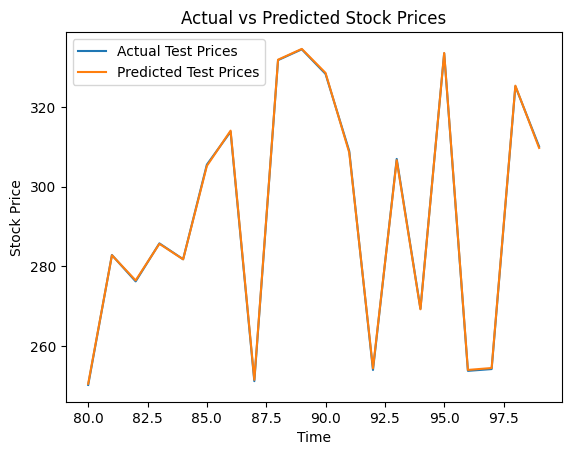

In [59]:

plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual Test Prices')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), predicted_test_prices, label='Predicted Test Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()